# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Riyadi Suryawan
- **Email:** Riyadi.suryawan@gmail.com
- **ID Dicoding:** riyadi_suryawan_7s0h

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara lokasi geografis pelanggan dan waktu pengiriman, kota apa yang terlama pengirimannya dan berapa hari waktu pengiriman yang meleset dari estimasi pengiriman?
- Bagaimana distribusi biaya pengiriman (freight_value) mempengaruhi keputusan pembelian dan tingkat pembatalan pesanan (order_status)? apakah biaya pengiriman menyebabkan customer membatalkan pesanannya?
- Apa Produk Terbanyak ordernya dan Bagaimana analisa RFM pada keseluruhan data yang ada?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
!pip install unidecode
import unidecode
import datetime as dt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
df_sellers=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df_products=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_category=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/product_category_name_translation.csv')
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
df_orders=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_reviews=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_reviews_dataset.csv')
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_payments=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_payments_dataset.csv')
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_items=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset.csv')
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_geolocation=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
df_customers=pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

In [ ]:
df_products.info()
df_geolocation.info()
df_items.info()
df_payments.info()
df_reviews.info()
df_orders.info()
df_sellers.info()
df_category.info()
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       -------

In [ ]:
df_products.isna().sum()


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
df_geolocation.isna().sum()


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
df_items.isna().sum()


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
df_payments.isna().sum()


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
df_reviews.isna().sum()


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
df_orders.isna().sum()


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
df_sellers.isna().sum()


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
df_category.isna().sum()


,0
product_category_name,0
product_category_name_english,0


In [ ]:
df_customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
#cek duplikasi
print(f'jumlah duplikasi customers        = {df_customers.duplicated().sum()}\n'
      f'jumlah duplikasi geolocation      = {df_geolocation.duplicated().sum()}\n'
      f'jumlah duplikasi items 		        = {df_items.duplicated().sum()}\n'
      f'jumlah duplikasi payment    	    = {df_payments.duplicated().sum()}\n'
      f'jumlah duplikasi review           = {df_reviews.duplicated().sum()}\n'
      f'jumlah duplikasi order            = {df_orders.duplicated().sum()}\n'
      f'jumlah duplikasi products         = {df_products.duplicated().sum()}\n'
      f'jumlah duplikasi seller           = {df_sellers.duplicated().sum()}\n'
      f'jumlah duplikasi category         = {df_category.duplicated().sum()}\n'
      )

jumlah duplikasi customers        = 0
jumlah duplikasi geolocation      = 261831
jumlah duplikasi items 		        = 0
jumlah duplikasi payment    	    = 0
jumlah duplikasi review           = 0
jumlah duplikasi order            = 0
jumlah duplikasi products         = 0
jumlah duplikasi seller           = 0
jumlah duplikasi category         = 0



In [ ]:
df_customers.describe()


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
df_geolocation.describe()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
df_items.describe()


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
df_payments.describe()


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
df_reviews.describe()


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df_orders.describe()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
df_products.describe()


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
df_sellers.describe()


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
df_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Cleaning Data

In [ ]:
#merapihkan data order

orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
#merapihkan data order_reviews

order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    df_reviews[col]=pd.to_datetime(df_reviews[col])

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
# merapihkan data order_items

order_item_col=['shipping_limit_date']
for col in order_item_col:
    df_items[col]=pd.to_datetime(df_items[col])

df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
df_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
#tidak membuang null value pada df_orders karena data yang lain seperti order_status masih bisa di gunakan, dan jika di replace/diisi harus menggunaka date/time,jadi data tetap saja
df_orders[df_orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [ ]:
df_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
#menghapus duplikasi data pada data gelolocation
df_geolocation.drop_duplicates(inplace=True)

In [ ]:
df_geolocation.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

Explore customer

In [ ]:
df_customers.sample(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
97928,9da65d090cc7853012b5f487e658bb97,392f7c62985d3366fe566eb2de44ec46,14210,luis antonio,SP
84777,19a4b3431071ef0088f9891c3fb8278a,cc82b8a8f2d47545f918781240432edb,2245,sao paulo,SP
90985,a5f535d75ecc62d3f397beb5802b5ce9,6409891d2f62a574d0f9c98931554ee0,74810,goiania,GO
52252,68a9d3c0bf69c9cba801481e649385fc,83b82ec5bf93a47ccfbe05452ea32009,13820,jaguariuna,SP
11592,1fd2567f42ea6e7de4f9772c09f1637f,a484d6a80277ccf24d9980cf34c47546,2242,sao paulo,SP
15821,48eab19088f16aa94632912e08ccb8bd,2381aabb8ad1faa91c14e6200ffab4a1,74984,aparecida de goiania,GO
64649,21b1540ea5bd484a35a8b46662a0b756,f20c1d28f91e4d11247d116b95a76e9e,41770,salvador,BA
56280,ac74922706425cb6b9b743b84d03d894,3b880ab941b6f84e459463cd1fc6fe85,25720,petropolis,RJ
59610,4ba69fcf8797e82d487139d557ca685d,2ae9c721d632d7cc6f6c99cbf051d4b9,17047,bauru,SP
21001,437412031d5669a073d875b0aa5f4152,cfaec087ed620ecebc6e6f82fe276fe2,74477,goiania,GO


In [ ]:
df_customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
df_customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False).head(20)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


Exploler produk dan produk category


In [ ]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
prod_cate_df=pd.merge(
    left=df_products,
    right=df_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
prod_cate_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Exploler Geolocation

In [ ]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [ ]:
df_geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,79926
1,rio de janeiro,RJ,35175
2,são paulo,SP,19717
3,belo horizonte,MG,19474
4,curitiba,PR,11263
...,...,...,...
8458,damião,PB,1
8459,davinópolis,GO,1
8460,são camilo,PR,1
8461,nova redencao bahia,BA,1


In [ ]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [ ]:
cust_orders_df = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [ ]:
cust_orders_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [ ]:
cust_orders_df.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

In [ ]:
# Menghitung selisih waktu pengiriman dalam hari
cust_orders_df['delivery_time_difference'] = (
   cust_orders_df['order_estimated_delivery_date'] - cust_orders_df['order_delivered_customer_date']
).dt.days


In [ ]:
cust_orders_df.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_difference
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,10.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,7.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,-2.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,12.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5.0
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,5.0
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,12.0
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,10.0
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,24.0
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05,22.0


In [ ]:
# Mengelompokkan data berdasarkan customer_city dan menghitung rata-rata selisih waktu pengiriman
avg_delivery_time_diff_by_city = cust_orders_df.groupby('customer_city')['delivery_time_difference'].mean()



In [ ]:
avg_delivery_time_diff_by_city.sort_values(ascending=False).head(10)

,delivery_time_difference
customer_city,
juruti,59.00
apuarema,41.00
alvorada d'oeste,40.00
xexeu,40.00
japoata,40.00
acari,39.00
boa vista das missoes,38.00
humaita,37.75
portalegre,37.50


In [ ]:
df_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [ ]:
df_orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [ ]:
items_orders_df = pd.merge(
    left=df_orders,
    right=df_items,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
items_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [ ]:
# Mengelompokkan data berdasarkan freight_value dan order_status
freight_status_group = items_orders_df.groupby(['freight_value', 'order_status']).size().reset_index(name='count')

# Mengurutkan data berdasarkan jumlah pesanan untuk tiap freight_value
top_freight_status_group = freight_status_group.sort_values(by='count', ascending=False).head(10)


print(top_freight_status_group)


      freight_value order_status  count
1710          15.10    delivered   3644
566            7.78    delivered   2212
1532          14.10    delivered   1824
1148          11.85    delivered   1806
2359          18.23    delivered   1553
506            7.39    delivered   1496
1928          16.11    delivered   1136
1746          15.23    delivered    994
716            8.72    delivered    884
2078          16.79    delivered    859


In [ ]:
# Menghitung rata-rata biaya pengiriman per pesanan
average_freight_per_order = items_orders_df['freight_value'].mean()

print("Rata-rata biaya pengiriman per pesanan:", average_freight_per_order)


Rata-rata biaya pengiriman per pesanan: 19.990319928983578


In [ ]:
# Menghitung total jumlah pesanan
total_orders = items_orders_df.shape[0]

# Menghitung jumlah pesanan yang dibatalkan
canceled_orders = items_orders_df[items_orders_df['order_status'] == 'canceled'].shape[0]

# Menghitung tingkat pembatalan
cancellation_rate = (canceled_orders / total_orders) * 100

print("Tingkat pembatalan pesanan:", cancellation_rate, "%")


Tingkat pembatalan pesanan: 0.6224377341855851 %


In [ ]:
# Mengelompokkan data berdasarkan order_status
avg_freight_by_status = items_orders_df.groupby('order_status')['freight_value'].mean().reset_index()

# Menampilkan hasil
print(avg_freight_by_status)


  order_status  freight_value
0     approved      10.493333
1     canceled      19.650277
2      created            NaN
3    delivered      19.948598
4     invoiced      20.786574
5   processing      25.083725
6      shipped      22.280084
7  unavailable      18.971429


In [ ]:
avg_freight_by_status.sort_values(by='freight_value',ascending=False).head(7)

,order_status,freight_value
5,processing,25.083725
6,shipped,22.280084
4,invoiced,20.786574
3,delivered,19.948598
1,canceled,19.650277
7,unavailable,18.971429
0,approved,10.493333


penggabungan semua

In [ ]:
cus_order_item_df=pd.merge(
    left=cust_orders_df,
    right=df_items,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
cus_order_item_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_difference,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,10.0,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,7.0,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,-2.0,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,12.0,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5.0,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [ ]:
cus_order_item_pay_df=pd.merge(
    left=cus_order_item_df,
    right=df_payments,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
cus_order_item_pay_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25


In [ ]:
cus_order_item_pay_prod_df=pd.merge(
    left=cus_order_item_pay_df,
    right=prod_cate_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
cus_order_item_pay_prod_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [ ]:
cus_order_item_pay_prod_sell_df=pd.merge(
    left=cus_order_item_pay_prod_df,
    right=df_sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
cus_order_item_pay_prod_sell_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940.0,ibitinga,SP


In [ ]:
all_df=pd.merge(
    left=cus_order_item_pay_prod_sell_df,
    right=df_reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,office_furniture,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,housewares,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,office_furniture,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,office_furniture,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,home_confort,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


RFM analisis


In [ ]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [ ]:
all_df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [ ]:
sekarang=dt.datetime(2018,10,30)

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])


recency = (sekarang - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()


rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [ ]:

num_columns = len(rfm.columns)
col_list = ['customer_id', 'Recency', 'Frequency', 'Monetary'] + ['Column' + str(i) for i in range(5, num_columns + 1)]  # Add placeholder names for extra columns

rfm.columns = col_list

In [ ]:
#Top 10 besar pelanggan dengan jumlah hari terdekat sejak transaksi terakhir
rfm.sort_values(by='Recency',ascending=True).head(10)

,customer_id,Recency,Frequency,Monetary,Column5,Column6,Column7
63970,a4b417188addbc05b26b72d5e44837a1,12,1,0.0,99441.0,43247.5,388.0
51713,856336203359aa6a61bf3826f7d84c49,13,1,0.0,99440.0,43247.5,388.0
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,26,1,0.0,99439.0,43247.5,388.0
74611,bf6181a85bbb4115736c0a8db1a53be3,28,1,0.0,99438.0,43247.5,388.0
15595,2823ffda607a2316375088e0d00005ec,30,1,0.0,99437.0,43247.5,388.0
33216,55c9dad94ec1a2ba57998bdb376c230a,33,1,0.0,99436.0,43247.5,388.0
47483,7a8a02e54cf3472df427e927f8b9c046,34,1,0.0,99435.0,43247.5,388.0
9770,191984a8ba4cbb2145acb4fe35b69664,39,1,0.0,99434.0,43247.5,388.0
67402,ad2eb5d02c0808bcd8743117f6383cf6,42,1,0.0,99433.0,43247.5,388.0
42488,6ddc45ad08e6a2c885ca2255fc52d6df,46,1,0.0,99432.0,43247.5,388.0


In [ ]:
# Top 10 customer yang sering bertransaksi
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list
rfm.sort_values(by='Frequency',ascending=False).head(10)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,447,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,401,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,557,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,509,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,170,24,359.76
52255,86cc80fef09f7f39df4b0dbce48e81cb,479,24,2914.68
38590,63b964e79dee32a3587651701a2b8dbf,257,24,9888.00
42897,6ee2f17e3b6c33d6a9557f280edd2925,599,24,4557.60
16961,2ba91e12e5e4c9f56b82b86d9031d329,338,24,2397.60
74119,be1c4e52bb71e0c54b11a26b8e8d59f2,377,22,1430.16


In [ ]:
# Top 10 customer dengan total pengeluaran/belanja terbesar
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list
rfm.sort_values(by='Monetary',ascending=False).head(10)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,395,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,557,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,518,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,257,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,172,7,9520.14
56788,926b6a6fb8b6081e00b335edaf578d35,559,2,7998.00
96899,f959b7bc834045511217e6410985963f,418,6,7799.40
91663,eb7a157e8da9c488cd4ddc48711f1097,146,2,7798.00
91985,ec5b2ba62e574342386871631fafd3fc,106,4,7160.00
19071,3118aefef04e5e97d0e339cd75d6d775,217,7,6909.00


In [ ]:
# Top 30 produk yang paling menguntungkan berdasarkan customer city
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False).head(30)

price
customer_city  product_category_name_english           
sao paulo      health_beauty                  195263.02
               bed_bath_table                 184140.58
               watches_gifts                  172269.07
               sports_leisure                 154139.05
               computers_accessories          147079.12
               housewares                     114218.96
               furniture_decor                108034.49
rio de janeiro watches_gifts                   93978.44
               health_beauty                   88299.24
               bed_bath_table                  83790.41
               sports_leisure                  72344.01
sao paulo      toys                            71858.98
               cool_stuff                      70350.21
rio de janeiro computers_accessories           66906.87
sao paulo      perfumery                       63087.10
               auto                            59935.45
rio de janeiro furniture_decor                 58947.46
sao paulo      baby                            56944.11
               garden_tools                    47029.03
rio de janeiro cool_stuff                      46970.38
               housewares                      45064.16
               toys                            44432.44
sao paulo      office_furniture                43860.86
               telephony                       39949.68
rio de janeiro garden_tools                    37066.43
               office_furniture                35948.44
sao paulo      musical_instruments             34865.10
belo horizonte health_beauty                   34223.77
               bed_bath_table                  34126.77
brasilia       watches_gifts                   33684.26

In [ ]:
all_df.groupby(by=['payment_type'])['review_score'].size().reset_index().sort_values(ascending=False,by='review_score')


,payment_type,review_score
1,credit_card,87776
0,boleto,23190
4,voucher,6465
2,debit_card,1706
3,not_defined,3


In [ ]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara lokasi geografis pelanggan dan waktu pengiriman, kota apa yang terlama pengirimannya dan berapa hari waktu pengiriman yang meleset dari estimasi pengiriman?

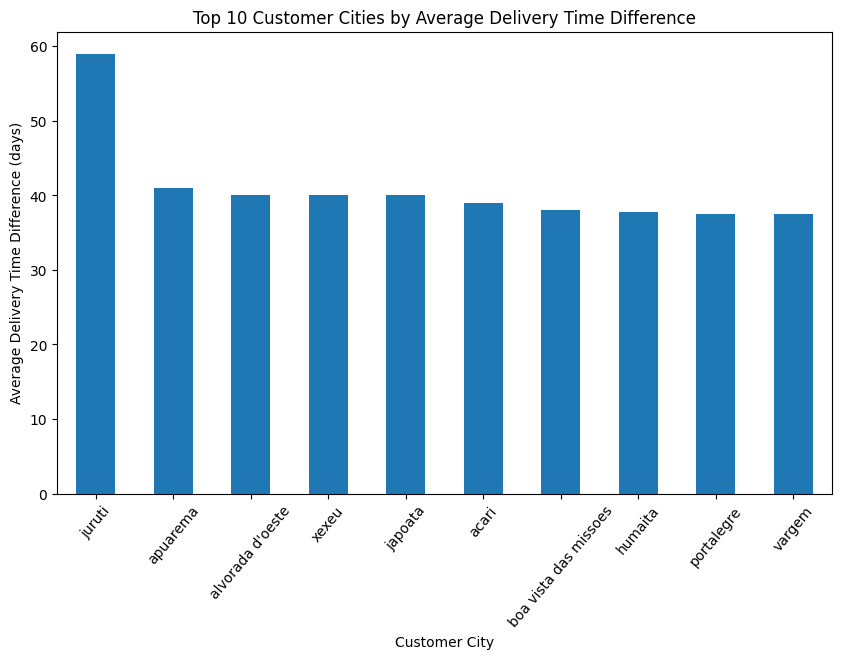

In [ ]:
# Mengurutkan rata-rata selisih waktu pengiriman dan mengambil 10 terbesar
top_10_cities = avg_delivery_time_diff_by_city.sort_values(ascending=False).head(10)



top_10_cities.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customer Cities by Average Delivery Time Difference')
plt.xlabel('Customer City')
plt.ylabel('Average Delivery Time Difference (days)')
plt.xticks(rotation=50)
plt.show()

### Pertanyaan 2: Bagaimana distribusi biaya pengiriman (freight_value) mempengaruhi keputusan pembelian dan tingkat pembatalan pesanan (order_status)? apakah biaya pengiriman menyebabkan customer membatalkan pesanannya?

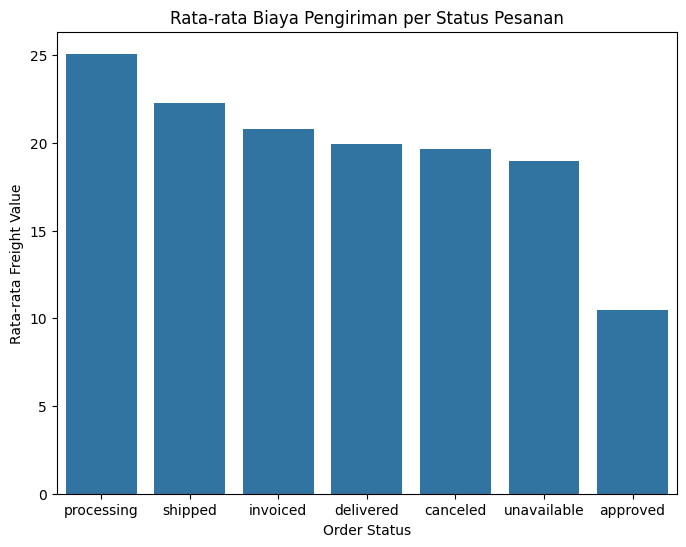

In [ ]:
# Visualisasi rata-rata biaya pengiriman berdasarkan status pesanan
plt.figure(figsize=(8, 6))
sns.barplot(x='order_status', y='freight_value', data=avg_freight_by_status.sort_values(by='freight_value',ascending=False).head(7))
plt.title('Rata-rata Biaya Pengiriman per Status Pesanan')
plt.xlabel('Order Status')
plt.ylabel('Rata-rata Freight Value')
plt.show()

Pertanyaan 3 : Apa Produk Terbanyak ordernya dan Bagaimana analisa RFM pada keseluruhan data yang ada?

In [ ]:
product_id_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
most_df = product_id_counts.sort_values(by='product_id', ascending=False).head(10)

most_df.plot(kind='bar', x='product_category_name_english', y='product_id', figsize=(10, 6))

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
49,housewares,7380
70,watches_gifts,6213
68,telephony,4726
42,garden_tools,4590
5,auto,4400


<Axes: xlabel='product_category_name_english'>

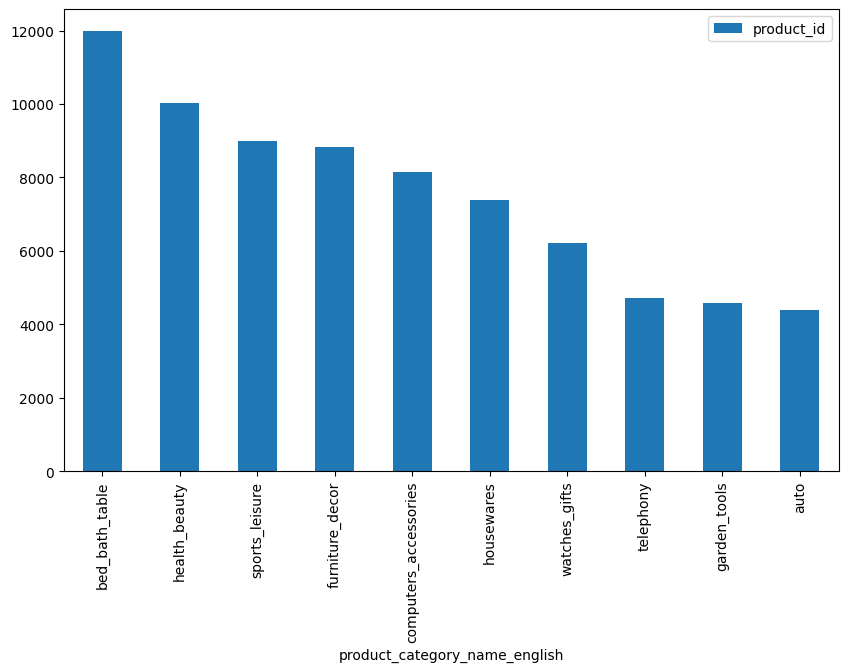

In [ ]:
most_df.plot(kind='bar', x='product_category_name_english', y='product_id', figsize=(10, 6))

<ipython-input-159-ee2493816636>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


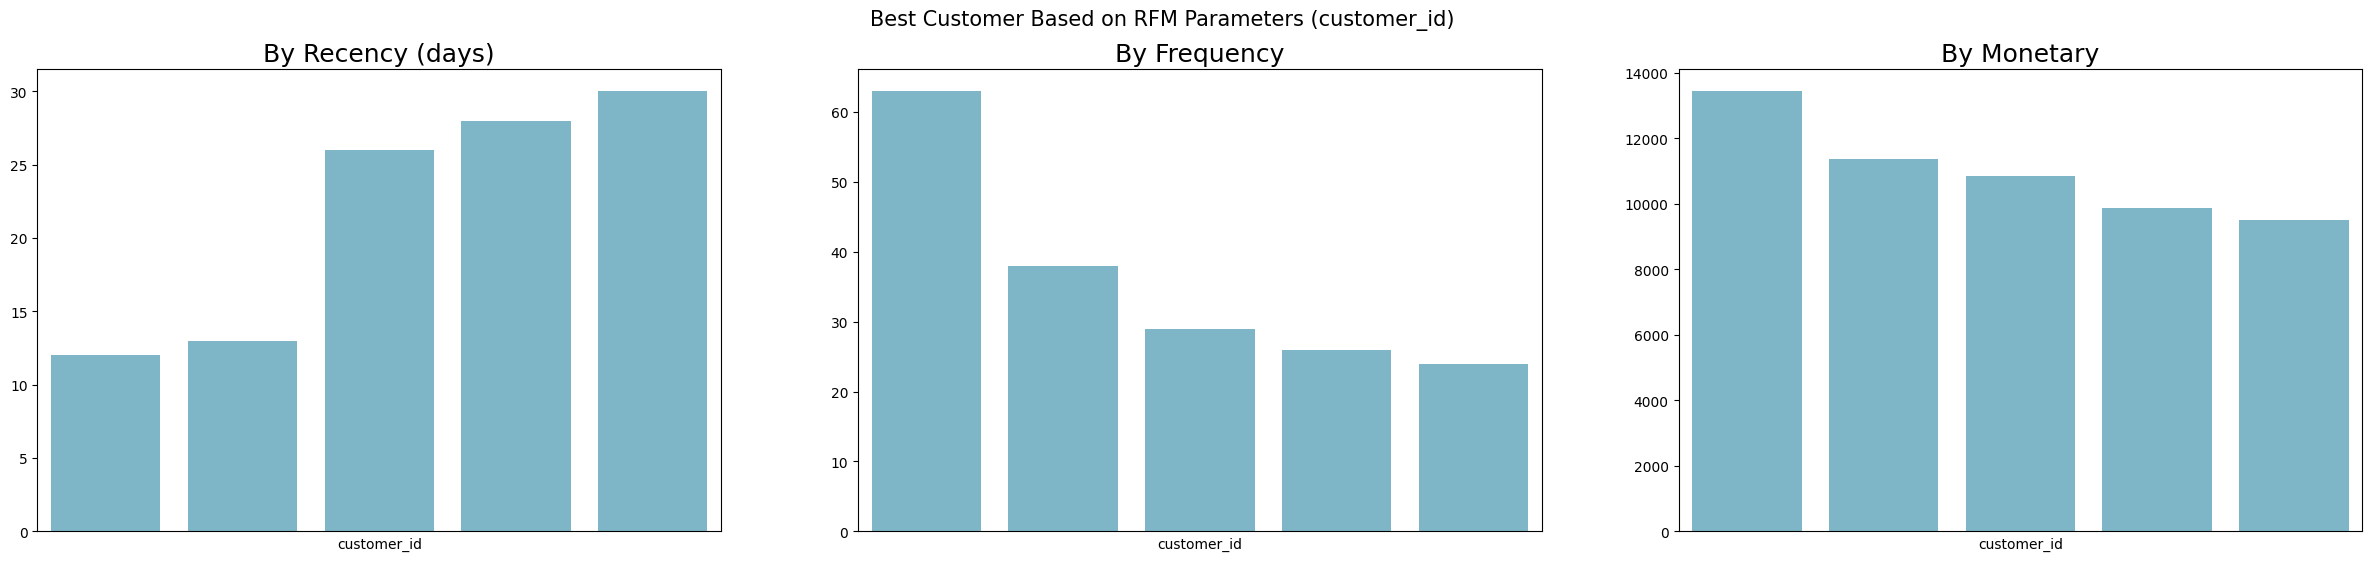

In [ ]:
#RFM analisis

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]




sns.barplot(y="Recency", x="customer_id",hue="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id",hue="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id",hue="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=15)
plt.show()

Mengurutkan customer berdasarkan recency, frequency, & monetary score

## Conclusion

- Conclution pertanyaan 1 :
  pada visualisasi data dapat terlihat kota Juruti menjadi kota yang terlama dalam hal pengiriman barang dan meleset/melenceng jauh dari estimasi/perkiraan waktunya hampir mendekati 60 hari, ini bisa mejadi perhatian untuk ecommerce dalam hal pengiriman barang ke 10 kota tersebut yang rata - rata tingkat melesetnya sangat tinggi.

  Action : mengevaluasi dan mengaudit area geografis di mana waktu pengiriman yang sering terlambat tersebut agar rentan waktu dari estimasi dan waktu pengiriman yang sebenarnya menjadi lebih pendek. Menambah Distributor/rekanan di atau pada 10 kota tersebut untuk membantu pendistribusian barang lebih cepat. mengevaluasi manajement rantai pasok yang sudah berjalan. meninjau kembali estimasi/perkiraan waktu pada 10 kota tersebut

  Mengetahui di mana masalah pengiriman terjadi dapat meningkatkan kepuasan pelanggan yang dimana nantinya akan berdampak pada profit ecommerce itu juga.
   


- Conclution pertanyaan 2 : Dari data dan visualisasi yang ada dapat kita simpulkan bahwa Rata-rata biaya pengiriman untuk pesanan yang dibatalkan(canceled) lebih tinggi daripada yang "approved", yang mungkin menunjukkan bahwa biaya pengiriman yang lebih tinggi bisa berpengaruh terhadap keputusan pembatalan pesanan. Rata-rata biaya pengiriman untuk pesanan yang berhasil dikirim (delivered) relatif tinggi, mendekati rata-rata biaya pengiriman pesanan yang dibatalkan disini terlihat bahwa besarnya pembatalan hampir sama porsinya dengan barang yang berhasil dikirim, yang artinya besar pula kesempatan profit ecommerce tersebut hilang. status processing menunjukkan biaya pengiriman tertinggi, yang mungkin disebabkan oleh penanganan khusus atau logistik yang lebih kompleks dari barang-barang pada umumnya
action : mengurangi biaya pengiriman agar barang-barang yang terjual lebih tinggi dan meminimalisir customer batal untuk membeli dengan Menyesuaikan strategi harga atau subsidi pengiriman.
Pengiriman adalah faktor penting dalam keputusan pembelian, yang dapat mempengaruhi profit dan kepuasan pelanggan


- Conclution pertanyaan 3 : Produk yang paling laku adalah bed_bath_table, dan analisa RFM secara keseluruhan adalah :

1. Top 10 besar customer dengan jumlah hari terdekat sejak transaksi terakhir:
  yang tidak masuk dalam kategori ini kemungkinan mereka tidak aktif lagi dalam jangka waktu yang lama, sehingga perlu adanya upaya reaktivasi, seperti kampanye pemasaran yang menargetkan mereka secara spesifik.
2. Top 10 customer yang sering bertransaksi adalah pelanggan yang sangat loyal dan kemungkinan besar memberikan kontribusi signifikan terhadap pendapatan perusahaan. Perusahaan harus mempertimbangkan strategi untuk mempertahankan pelanggan ini, seperti program loyalitas atau penawaran khusus.
3. Top 10 customer dengan total pengeluaran/belanja terbesar adalah pelanggan yang paling bernilai bagi perusahaan. Mereka memberikan pendapatan terbesar dan karenanya perusahaan harus mempertimbangkan untuk menawarkan layanan premium atau penawaran eksklusif untuk meningkatkan kepuasan mereka.
4. Top 30 produk yang paling menguntungkan berdasarkan customer city: memberikan wawasan tentang produk yang paling diminati di kota-kota tertentu. Ini bisa digunakan untuk mengoptimalkan stok produk, strategi pemasaran lokal, dan penawaran produk di area geografis yang berbeda.



- Conclution pertanyaan 1 :
  pada visualisasi data dapat terlihat kota Juruti menjadi kota yang terlama dalam hal pengiriman barang dan meleset/melenceng jauh dari estimasi/perkiraan waktunya hampir mendekati 60 hari, ini bisa mejadi perhatian untuk ecommerce dalam hal pengiriman barang ke 10 kota tersebut yang rata - rata tingkat melesetnya sangat tinggi.

  Action : mengevaluasi dan mengaudit area geografis di mana waktu pengiriman yang sering terlambat tersebut agar rentan waktu dari estimasi dan waktu pengiriman yang sebenarnya menjadi lebih pendek. Menambah Distributor/rekanan di atau pada 10 kota tersebut untuk membantu pendistribusian barang lebih cepat. mengevaluasi manajement rantai pasok yang sudah berjalan. meninjau kembali estimasi/perkiraan waktu pada 10 kota tersebut.Mengetahui di mana masalah pengiriman terjadi dapat meningkatkan kepuasan pelanggan yang dimana nantinya akan berdampak pada profit ecommerce itu juga.
   


- Conclution pertanyaan 2 : Dari data dan visualisasi yang ada dapat kita simpulkan bahwa Rata-rata biaya pengiriman untuk pesanan yang dibatalkan(canceled) lebih tinggi daripada yang "approved", yang mungkin menunjukkan bahwa biaya pengiriman yang lebih tinggi bisa berpengaruh terhadap keputusan pembatalan pesanan. Rata-rata biaya pengiriman untuk pesanan yang berhasil dikirim (delivered) relatif tinggi, mendekati rata-rata biaya pengiriman pesanan yang dibatalkan disini terlihat bahwa besarnya pembatalan hampir sama porsinya dengan barang yang berhasil dikirim, yang artinya besar pula kesempatan profit ecommerce tersebut hilang. status processing menunjukkan biaya pengiriman tertinggi, yang mungkin disebabkan oleh penanganan khusus atau logistik yang lebih kompleks dari barang-barang pada umumnya.
action : mengurangi biaya pengiriman agar barang-barang yang terjual lebih tinggi dan meminimalisir customer batal untuk membeli dengan Menyesuaikan strategi harga atau subsidi pengiriman. Pengiriman adalah faktor penting dalam keputusan pembelian, yang dapat mempengaruhi profit dan kepuasan pelanggan


- Conclution pertanyaan 3 : Produk yang paling laku adalah bed_bath_table, dan analisa RFM secara keseluruhan adalah :

1. Top 10 besar customer dengan jumlah hari terdekat sejak transaksi terakhir:
  yang tidak masuk dalam kategori ini kemungkinan mereka tidak aktif lagi dalam jangka waktu yang lama, sehingga perlu adanya upaya reaktivasi, seperti kampanye pemasaran yang menargetkan mereka secara spesifik.
2. Top 10 customer yang sering bertransaksi adalah pelanggan yang sangat loyal dan kemungkinan besar memberikan kontribusi signifikan terhadap pendapatan perusahaan. Perusahaan harus mempertimbangkan strategi untuk mempertahankan pelanggan ini, seperti program loyalitas atau penawaran khusus.
3. Top 10 customer dengan total pengeluaran/belanja terbesar
4. Top 30 produk yang paling menguntungkan berdasarkan customer city

Identifikasi Pelanggan Loyal:

Pelanggan yang masuk dalam kategori "Top 10 customer yang sering bertransaksi" (Frequency tinggi) adalah

Pelanggan Berisiko:

Pelanggan yang berada di luar "Top 10 besar customer dengan jumlah hari terdekat sejak transaksi terakhir" (Recency rendah) mungkin berisiko.

Pelanggan Bernilai Tinggi:

"Top 10 customer dengan total pengeluaran/belanja terbesar" (Monetary tinggi) adalah pelanggan yang paling bernilai bagi perusahaan. Mereka memberikan pendapatan terbesar dan karenanya perusahaan harus mempertimbangkan untuk menawarkan layanan premium atau penawaran eksklusif untuk meningkatkan kepuasan mereka.

Optimalisasi Produk:

Analisis "Top 30 produk yang paling menguntungkan berdasarkan customer city" memberikan wawasan tentang produk yang paling diminati di kota-kota tertentu. Ini bisa digunakan untuk mengoptimalkan stok produk, strategi pemasaran lokal, dan penawaran produk di area geografis yang berbeda.